## DSBDAL Assignment 9

### Data Visualization II

#### Importing required libraries

In [1]:
##!pip install seaborn
import seaborn as sns
##!pip install datasets
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np

#### Loading the titanic dataset using seaborn

In [2]:
data = sns.load_dataset('titanic')

In [3]:
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
data.dtypes

survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object

In [5]:
missing_values = data.isnull().sum()
missing_values

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

#### Dealing with missing values

#### (i) Age - replacing with mean

In [6]:
nan_value = float("NaN")
data.replace("",nan_value,inplace = True)
data.age.replace(nan_value,data.age.mean(),inplace = True)

#### (ii) Deck - dropping the column

In [7]:
data.drop(['deck'],axis=1,inplace = True)

#### (iii) Embark town - replacing null values with the maximum value

In [8]:
data.embark_town.value_counts()

Southampton    644
Cherbourg      168
Queenstown      77
Name: embark_town, dtype: int64

In [9]:
data['embark_town'].replace(nan_value,'Southampton',inplace = True)

#### (iv) Embarked value - replacing null values with the max value

In [10]:
data.embarked.value_counts()

S    644
C    168
Q     77
Name: embarked, dtype: int64

In [11]:
data['embarked'].replace(nan_value,'S',inplace = True)

In [12]:
missing_values = data.isnull().sum()
missing_values

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

#### Converting categorical variables into numeric values

#### Male - 0, Female - 1

In [13]:
data.sex.value_counts()

male      577
female    314
Name: sex, dtype: int64

In [14]:
data.sex.replace("male","0",inplace=True)
data.sex.replace("female","1",inplace = True)
data.sex = data.sex.astype(int)

#### S - 0, C - 1, Q - 2

In [15]:
data.embarked.value_counts()

S    646
C    168
Q     77
Name: embarked, dtype: int64

In [16]:
data.embarked.replace("S","0",inplace=True)
data.embarked.replace("C","1",inplace = True)
data.embarked.replace("Q","2",inplace = True)
data.embarked = data.embarked.astype(int)

#### Southhampton - 0, Cherbourg - 1,  Queenstown - 2

In [17]:
data.embark_town.value_counts()

Southampton    646
Cherbourg      168
Queenstown      77
Name: embark_town, dtype: int64

In [18]:
data.embark_town.replace("Southampton",0,inplace = True)
data.embark_town.replace("Cherbourg",1,inplace = True)
data.embark_town.replace("Queenstown",2,inplace = True)
data.embark_town = data.embark_town.astype(int)

#### First - 0, Second - 1, Third - 2

In [19]:
data['class'].value_counts()

Third     491
First     216
Second    184
Name: class, dtype: int64

In [20]:
data['class'].replace('First','0',inplace = True)
data['class'].replace('Second','1',inplace = True)
data['class'].replace('Third','2',inplace = True)
data['class'] = data['class'].astype(int)

#### Man - 0, Woman - 1, Child - 2

In [21]:
data.who.value_counts()

man      537
woman    271
child     83
Name: who, dtype: int64

In [22]:
data['who'].replace('man','0',inplace = True)
data['who'].replace('woman','1',inplace = True)
data['who'].replace('child','2',inplace = True)
data['who'] = data['who'].astype(int)

#### True - 1, False - 0

In [23]:
data.adult_male.value_counts()

True     537
False    354
Name: adult_male, dtype: int64

In [24]:
data.adult_male = data.adult_male.astype(int)

In [25]:
data.alone = data.alone.astype(int)

In [26]:
data.alive.value_counts()

no     549
yes    342
Name: alive, dtype: int64

In [27]:
data.survived.value_counts()

0    549
1    342
Name: survived, dtype: int64

#### Dropping alive

In [28]:
data.drop(['alive'],axis=1,inplace = True)

### Visualization and inference

### (i) Boxplot 

<AxesSubplot:xlabel='sex', ylabel='age'>

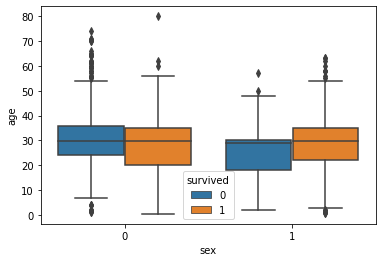

In [40]:
sns.boxplot(y =data['age'], x =data['sex'], hue=data['survived'])

In [41]:
## Observations -
## Females - median age of both who survived and died is 30, a lot of elderly women did not survive
## Males - median age for both classes is roughly 30, a significant number of elderly men survived

### (ii) Barplot

<AxesSubplot:xlabel='sex', ylabel='age'>

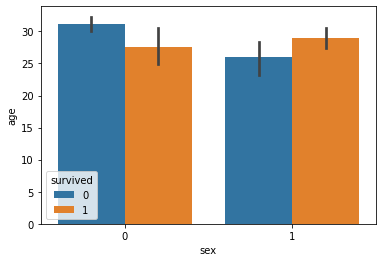

In [42]:
sns.barplot(y =data['age'], x =data['sex'], hue=data['survived'])

In [43]:
## Observations -
## The age range of women who survived is lesser than the age of men who survived 
## The age range of women who did not survive is more than that of men

### (iii) Swarmplot

/home/pict/.local/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 27.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/pict/.local/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 15.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='sex', ylabel='age'>

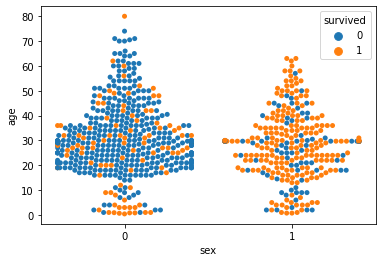

In [44]:
sns.swarmplot(y =data['age'], x =data['sex'], hue=data['survived'])

In [45]:
## Observations 
## A very high number of women from different age groups survived 
## A very small number of men survived and a significant number of them are children

### (iv) Stripplot

<AxesSubplot:xlabel='sex', ylabel='age'>

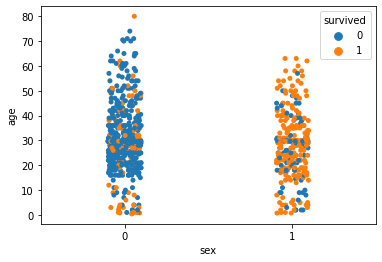

In [46]:
sns.stripplot(y =data['age'], x =data['sex'], hue=data['survived'])

In [47]:
## Observations 
## A very high number of women from different age groups survived 
## A very small number of men survived and a significant number of them are children 

### (v) Violinplot

<AxesSubplot:xlabel='sex', ylabel='age'>

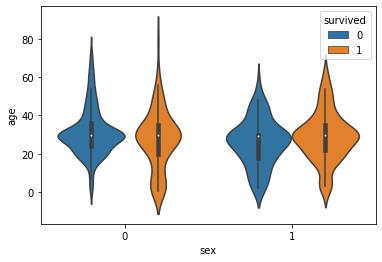

In [48]:
sns.violinplot(y =data['age'], x =data['sex'], hue=data['survived'])

In [49]:
## Observations 
## A significant number of men and women around their thirties survived as well as died
## More number of women survived in their 30s than men 

### (vi) Histplot

<AxesSubplot:xlabel='sex', ylabel='age'>

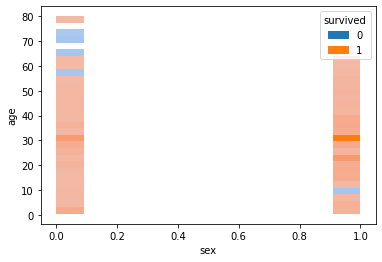

In [50]:
sns.histplot(y =data['age'], x =data['sex'], hue=data['survived'])

In [51]:
## Observations 
## Men in the range of 55 to 75 did not survive, whereas women in the range of 65 to 80 did not 
## Most men and women who did not survive were in the elderly range 